# BONUS Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias significativas en el número de vuelos reservados según el nivel educativo de los clientes. Para ello, los pasos que deberás seguir son:

1. Preparación de Datos: Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.

In [8]:
# Importamos las librerías necesarias para la visualización y análisis estadístico
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro, levene
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Cargamos el DataFrame limpio

df_unificado = pd.read_csv("df_unificado_limpio.csv", index_col=0)

In [3]:
df_filtrado = df_unificado[['Flights Booked', 'Education']]
df_filtrado

,Flights Booked,Education
0,3,Bachelor
1,10,College
2,6,College
3,0,Bachelor
4,0,Bachelor
...,...,...
405619,0,College
405620,0,Doctor
405621,3,Bachelor
405622,0,College


2. Análisis Descriptivo: Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estándar) del número de vuelos reservados para cada grupo.

In [4]:
# Estadísticas descriptivas.

estadisticas = df_filtrado.groupby("Education")["Flights Booked"].agg(["mean", "median", "std", "var", "min", "max"]).round(2)
estadisticas

,mean,median,std,var,min,max
Education,,,,,,
Bachelor,4.11,1.0,5.22,27.27,0,21
College,4.17,1.0,5.25,27.52,0,21
Doctor,4.18,1.0,5.26,27.64,0,21
High School or Below,4.18,1.0,5.24,27.45,0,21
Master,4.20,1.0,5.21,27.19,0,21


3. Prueba Estadística: Realiza una prueba de hipótesis para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos

In [5]:
#Sacamos los valores únicos de la columna Education para ver las categorías presentes
niveles = df_filtrado["Education"].unique()

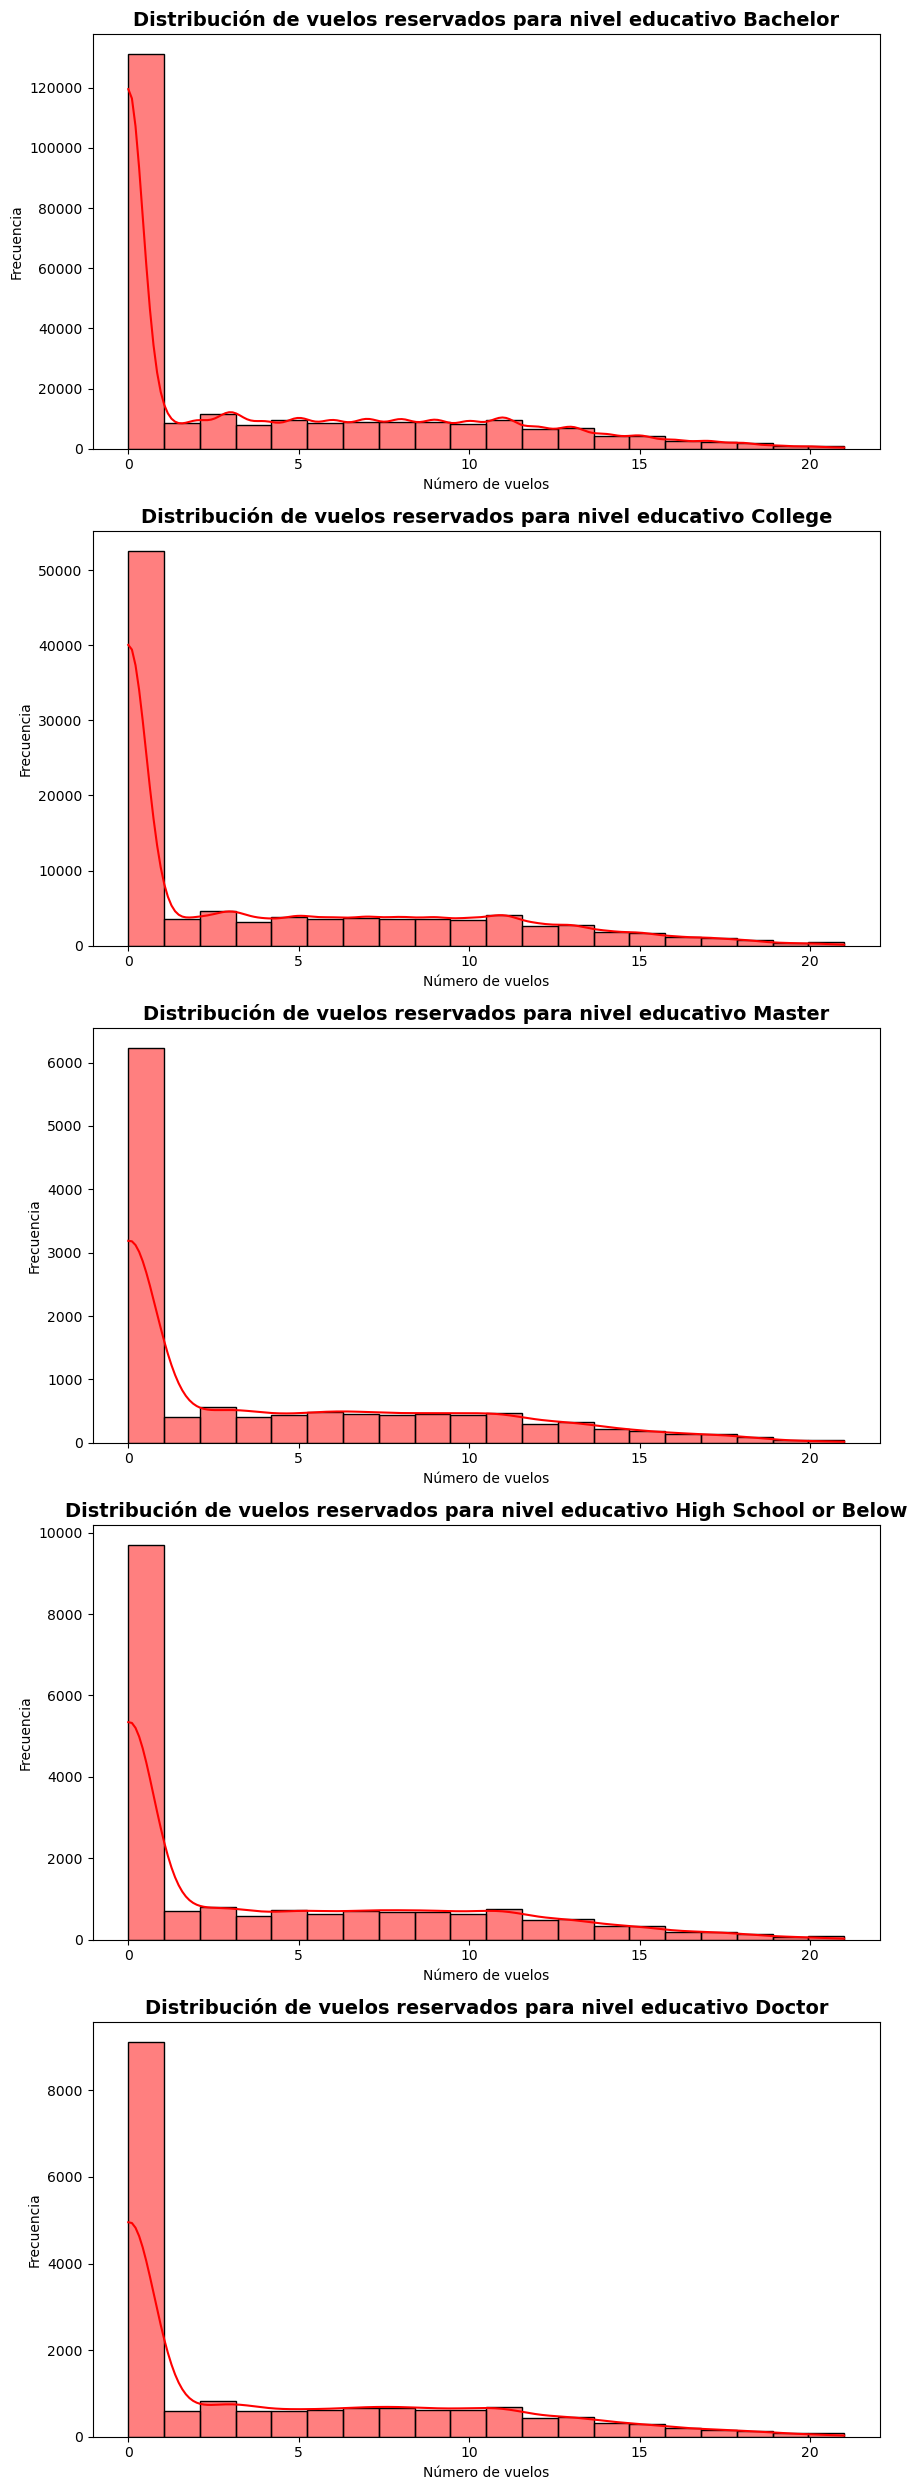

In [6]:
# Creamos una figura con subplots, uno por cada nivel educativo para visualizar la distribución de vuelos reservados.

fig, axes = plt.subplots(nrows=len(niveles), figsize=(9, 5 * len(niveles)))

# Iteramos sobre cada nivel educativo y creamos un histograma para cada uno para visualizar mejor cómo están los datos.

for i, nivel in enumerate(niveles):
    sns.histplot(x='Flights Booked', 
                data=df_filtrado[df_filtrado['Education'] == nivel], 
                ax=axes[i],
                color='red',
                kde=True,
                bins=20)
    axes[i].set_title(f'Distribución de vuelos reservados para nivel educativo {nivel}',fontsize=14, color='black', weight = 'bold')
    axes[i].set_xlabel('Número de vuelos')
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Conclusión: 

La distribución de los datos indica que la mayoría de los clientes reservan un número bajo de vuelos, concretamente entre 0 y 1.

Ya que la curva disminuye bruscamente cuanto más nos acercamos a un número alto de vuelos podemos inferir que existen valores atípicos, lo que se traduce en que poca gente reserva muchos vuelos.

Los datos no siguen una distribución normal para ninguno de los niveles educativos.

3. Prueba Estadística: 
Realiza una prueba de hipótesis para determinar si existe una diferencia
significativa en el número de vuelos reservados entre los diferentes niveles educativos.

In [ ]:
# Dado que a priori y teniendo en cuenta los histogramas anteriores, hemos podido inferir que la distribución de los datos no es normal, y por ello vamos a realizar el test de LEVENE para comprobar la homogeneidad de varianzas entre los grupos.

# Obtenemos los niveles educativos únicos.
niveles = df_filtrado['Education'].unique()

# Creamos una lista para almacenar los datos de cada nivel educativo.
vuelos_agrupados = []

# Iteramos por cada nivel educativo y agregar los datos a la lista.
for nivel in niveles:
    vuelos_grupo = df_filtrado[df_filtrado['Education'] == nivel]['Flights Booked']
    vuelos_agrupados.append(vuelos_grupo)

# Realizamos la prueba de Levene con todos los grupos.
statistic, p_value = stats.levene(*vuelos_agrupados)

# Imprimimos los resultados.
print("Prueba de Levene para todos los niveles educativos:")
print(f"  Estadístico de Levene: {statistic}")
print(f"  p-valor: {p_value}")

# Evaluamos la homogeneidad de varianzas.
if p_value > 0.05:
    print("Las varianzas son homogéneas entre todos los grupos.")
else:
    print("Las varianzas NO son homogéneas entre todos los grupos.")

Prueba de Levene para todos los niveles educativos:
  Estadístico de Levene: 3.0859845824023706
  p-valor: 0.014969793534581529
Las varianzas NO son homogéneas entre todos los grupos.


In [16]:
# Dado que ni la distribución de los datos es normal ni las varianzas son homogéneas, vamos a realizar el test de Mann-Whitney U para comparar las medianas de los grupos.

 # Obtenemos los niveles educativos únicos.
niveles = df_filtrado['Education'].unique() 
vuelos_agrupados = []

# Creamos una lista de los grupos de vuelos por nivel educativo.
for nivel in niveles:
    vuelos_agrupados.append(df_filtrado[df_filtrado['Education'] == nivel]['Flights Booked'])

# Realizamos el test de Mann-Whitney para todas las posibles combinaciones de grupos.
for i in range(len(vuelos_agrupados)):
    for j in range(i+1, len(vuelos_agrupados)):
        # Comparamos los grupos i y j.
        statistic, p_value = stats.mannwhitneyu(vuelos_agrupados[i], vuelos_agrupados[j])

        # Imprimimos los nombres de los grupos que estamos comparando.
        print(f"Comparación entre los grupos {niveles[i]} y {niveles[j]}:")
        print(f"  Estadístico U: {statistic}")
        print(f"  p-valor: {p_value}")
        
        # Evaluamos si hay una diferencia significativa entre las medianas.
        if p_value < 0.05:
            print("  Hay una diferencia significativa entre las medias de los dos grupos.")
        else:
            print("  No hay una diferencia significativa entre las medias de los dos grupos.")
        print()  # Salto de línea para mayor claridad en la salida.

Comparación entre los grupos Bachelor y College:
  Estadístico U: 12834460862.5
  p-valor: 0.002278100128804696
  Hay una diferencia significativa entre las medias de los dos grupos.

Comparación entre los grupos Bachelor y Master:
  Estadístico U: 1532540228.0
  p-valor: 0.014056962299193064
  Hay una diferencia significativa entre las medias de los dos grupos.

Comparación entre los grupos Bachelor y High School or Below:
  Estadístico U: 2368160009.0
  p-valor: 0.036000727159277525
  Hay una diferencia significativa entre las medias de los dos grupos.

Comparación entre los grupos Bachelor y Doctor:
  Estadístico U: 2223352413.5
  p-valor: 0.09460787010212152
  No hay una diferencia significativa entre las medias de los dos grupos.

Comparación entre los grupos College y Master:
  Estadístico U: 624388384.5
  p-valor: 0.23837842894303352
  No hay una diferencia significativa entre las medias de los dos grupos.

Comparación entre los grupos College y High School or Below:
  Estadísti